<a href="https://colab.research.google.com/github/Annieng184/Annieng184/blob/main/Data_Reporting_with_Pandas_Numpy_and_Matplotlib_(part1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io



In [ ]:
#get data files here: https://drive.google.com/drive/folders/1Y2rY-n_iO1dJYcnOgaFhzjPYHr_fD_pD
#merge 12 seperated csv files through terminal on mac
#step 1: Open Terminal. Enter 'pwd'. Hit Enter
#step 2: Type 'cd'. Paste file path "/Users/devin/Desktop/combine". Hit Enter
#step 3: Type "cat *.csv >sales_2019.csv" 


In [73]:
#import file from local drive
from google.colab import files
uploaded = files.upload()

Saving sales_2019.csv to sales_2019 (1).csv


In [74]:
df = pd.read_csv(io.BytesIO(uploaded['sales_2019.csv']))
print(df)
len(df)

       Order ID                   Product Quantity Ordered Price Each  \
0        141234                    iPhone                1        700   
1        141235  Lightning Charging Cable                1      14.95   
2        141236          Wired Headphones                2      11.99   
3        141237          27in FHD Monitor                1     149.99   
4        141238          Wired Headphones                1      11.99   
...         ...                       ...              ...        ...   
186856   259353    AAA Batteries (4-pack)                3       2.99   
186857   259354                    iPhone                1        700   
186858   259355                    iPhone                1        700   
186859   259356    34in Ultrawide Monitor                1     379.99   
186860   259357      USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       01/22/19 21:25          944 Walnut St, Boston, MA

186861

In [78]:
#clean and update dataframe
df = df.dropna() #remove empty row in dataframe
len(df)


186316

In [79]:
#QUESTION 1: WHAT WAS THE BEST MONTH FOR SALES?
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [80]:
#add month column
df['Month'] = df['Order Date'].str.slice(0,2,1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [81]:
#check values of Month column
print(set(df['Month'])) 

{'04', '10', '05', '06', '01', '11', '09', '02', '12', '08', '03', '07', 'Or'}


In [82]:
#get rid of 'Or' value
df = df[df['Month'] != 'Or']

In [83]:
#check current values of Month column
print(set(df['Month'])) 

{'04', '10', '05', '06', '01', '11', '09', '02', '12', '08', '03', '07'}


In [86]:
#create Sales column by multiplying Quantity Ordered and Price Each (make sure both of them converted to int)
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


In [88]:
#convert Quantity Ordered and Price Each to int in order to multiplying
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')

In [89]:
#double check
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [91]:
#create Sales column by multiplying Quantity Ordered and Price Each
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [92]:
#move Sales column next to Price Each for better look
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [100]:
#calculate total Sales by Month
df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [101]:
sales_value = df.groupby('Month').sum()['Sales']


In [102]:
sales_value.max() #find the max values


4613443.5

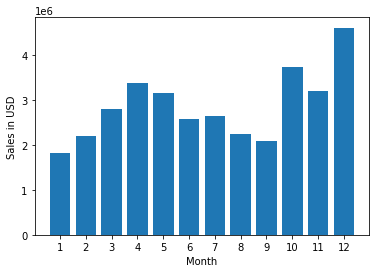

In [110]:
#visualize into chart
months = range(1,13)
plt.bar(x = months, height = sales_value)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()